# SciPy tutorial

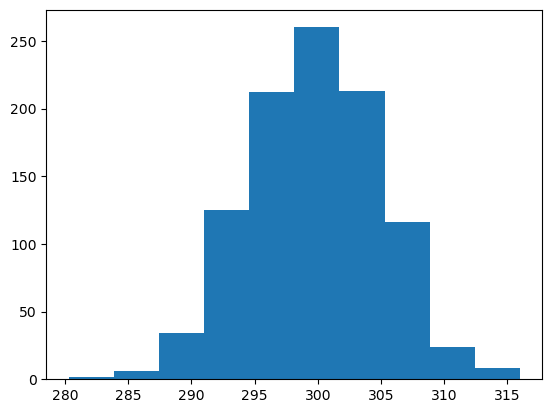

In [1]:
# 정규성 검정
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [2]:
from scipy import stats
print(dir(stats))

['BootstrapMethod', 'CensoredData', 'ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'MonteCarloMethod', 'NearConstantInputWarning', 'PermutationMethod', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ansari_swilk_statistics', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_bws_test', '_censored_data', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multicomp', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_qmvnt', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sampling', '_sensitivity_analysis', '_sobol', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_su

In [3]:
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9981433805517022, pvalue=0.34796592330595577)


-> 샤피로 검정 시, p-value=0.35 -> 유의수준 5%에서 귀무가설 기각 불가
=> 귀무가설 채택. 정규성을 가진다.<br>
<br>
p-value가 유의수준보다 크면, 유의하므로 귀무가설 기각할 수 없음 -> 귀무가설 채택<br>
p-value < 유의수준이면, 유의하지 않으므로, 귀무가설 기각 -> 대립가설 채택

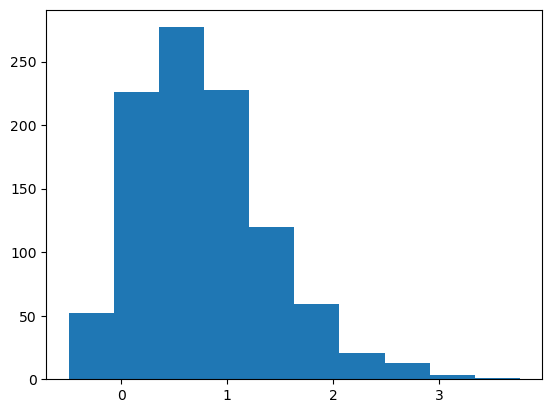

In [4]:
# 2
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [5]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9578887230674161, pvalue=2.3098528601775786e-16)


**p-value = 2.3e-16** (아주 작은수...)
-> p-value < 0.05 : 유의수준 5%에서 귀무가설 기각 가능, 대립가설 채택<br>
=> 데이터는 정규성을 가지지 않는다.

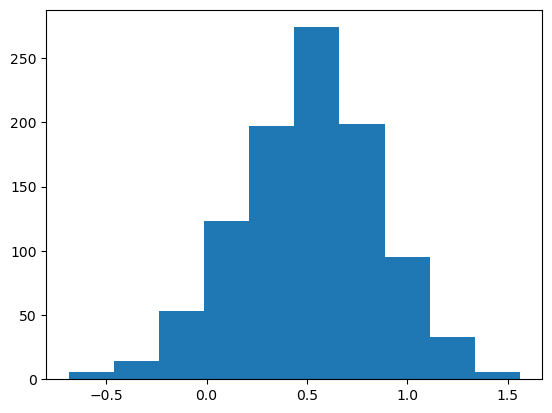

In [6]:
# 3 log 변환 후 정규성 가지는 지 확인
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)  # 로그변환!!!!!!
plt.hist(log_y_data)
plt.show()

In [8]:
from scipy.stats import shapiro
print(shapiro(log_y_data))

ShapiroResult(statistic=0.9976879570377135, pvalue=0.17513126966872208)


로그변환 한 데이터 -> p-value > 0.05 귀무가설 기각불가. 귀무가설 채택 <br>
=> 정규성을 가진다.

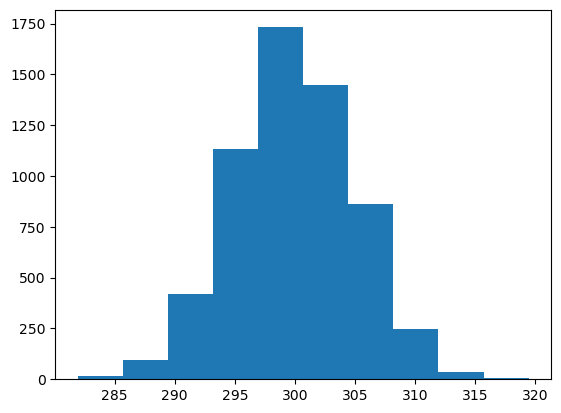

In [9]:
# 7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [10]:
from scipy.stats import shapiro

print(shapiro(df))

ShapiroResult(statistic=0.9995353804150279, pvalue=0.15046155392344363)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


shapiro 검정 시, p-value > 0.05 이므로 귀무가설 유의함. 귀무가설 기각 불가. 귀무가설 채택<br>
**경고메세지**
5000개 초과의 샘플에 대해서 샤피로 검정은 정확하지 않을 수 o <br>
=> anderson 검정

In [12]:
# anderson 검정(N > 5000)
from scipy.stats import anderson
print(anderson(df['data'].values))

AndersonResult(statistic=0.8266993530396576, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.03180688788513)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


### anderson 검정 결과 해석
significance_level : 유의 확률값
critical_values : 각 유의확률 값의 기준점
- 유의수준 5%에서 검정 진행 -> significance_level 5.에서 확인 => critical_values= 0.786
- statistic = 0.82
- **p-value로 판단할 때와 반대..**
- 0.82 > 0.786 (statistic > critical_values) => 귀무가설 기각. 대립가설 채택
=> 정규성을 가지지 않는다.

# 단일 표본 t-검정(one-sample)

100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

1. 데이터가 정규성을 만족하는지 확인
2. 정규성을 만족하는 경우
   - 평균 165인지 검정 : 단일 표본 t-검정

3. 정규성을 만족하지 않는 경우
   - 평균 165인지 검정: 윌콕슨 부호순위 검정(비모수)
   - 샘플이 정규분포를 따르지 않으므로,
   - 평균이 아닌 중앙값 기준의 검정 수행
   - df['height'] - 165 형태로 중심값을 기준으로 편차의 부호/순위 계산

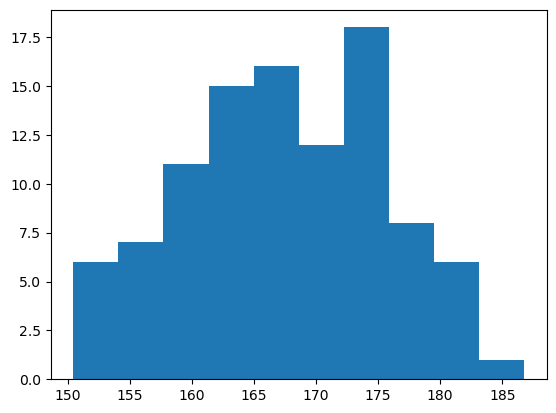

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
plt.hist(df)
plt.show()

In [14]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9872671038154957, pvalue=0.45583339816328994)


p-value > 0.05 이므로 귀무가설 유의. 기각불가. 정규성을 만족한다.

In [15]:
# 평균키 = 165라 할 수 있는지 귀무가설, 대립가설 설정 후 유의수준 5% 검정
# H0: m = 165 , H1: m != 165

from scipy.stats import ttest_1samp, shapiro, wilcoxon
# 데이터의 정규성 먼저 검정
static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value: ', pvalue,'이므로')

# 데이터가 정규성을 만족하지 않는 경우
if pvalue < 0.05 : 
    print('귀무가설 기각. 정규성 만족하지 않으므로 비모수 검정 진행. 윌콕슨 순위 부호 검정 진행')

    # 윌콕슨 부호순위 검정
    static, pvalue = wilcoxon(df['height']-165)
    # static, pvalue = wilcoxon(df['height'], np.ones(len(df) * 165) # 여러 표본쌍을 비교할 때 일반적인 형식

    if pvalue < 0.05:
        print(f'검정결과 pvalue 는 {pvalue}이므로 귀무가설 기각. 평균은 165가 아니다')
    else:
        print('평균은 165')

# 데이터가 정규성을 만족하는 경우 -> t-검정
else:
    # 단일 표본 t검정
    static, pvalue = ttest_1samp(df['height'], 165)
    if pvalue < 0.05:
        print('귀무가설 기각')
    else:
        print('귀무가설 채택')
    

샤피로 정규성 검정 p-value:  0.45583339816328994 이므로
귀무가설 기각


## 등분산 검정
두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [16]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [19]:
# 등분산 검정 - 3가지 방법
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

# a, b: pandas.Series 객체
a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

#bartlett : 데이터가 정규분포일때 (계산기준 -> 평균)
print(bartlett(a,b))

print(fligner(a,b,center='median')) # default
print(fligner(a,b,center='mean'))
# fligner() : 함수 내부에서 각 그룹의 분산(산포도)를 측정할 때, 
# 데이터 중심으로부터 얼마나 떨어져 있는지를 측정해야됨
# 중심을 어떤 값으로 보느냐 -> center 옵션(기본값: 'median')
# mean: 각 그룹의 평균을 중심으로 분산 계산
# trimmed: 양 끝 10%를 제외한 절사 평균 사용

print(levene(a,b,center='median')) # default
print(levene(a,b,center='mean'))

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


**center설정**<br>
mean: 이상치에 민감 <br>
median: 비정규분포나 이상치가 있는 데이터에서 훨씬 안정적 <br>
trimmed mean: 극단 값을 잘라내고 평균을 내서 둘 사이의 절충값 <br>

**함수 선정 기준**
- bartlett(): 정규분포+등분산 검정
- levene(): 정규성 여부 애매할 때
- fligner(): 정규성 완전히 무시하고 싶을 때

모든 p-value > 0.05 이므로 귀무가설이 유의함. 귀무가설 기각 불가.<br>
=> 등분산성을 만족한다.

두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라



In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
print(df)

    class  score
0       A     32
1       A     69
2       A     68
3       A     60
4       A     78
..    ...    ...
475     B     60
476     B     56
477     B     56
478     B     52
479     B     77

[480 rows x 2 columns]


In [23]:
from scipy.stats import fligner

# 그룹별로 분리
a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

print(fligner(a,b,center='median'))


FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615536)


fligner, levene는 bartlett보다 좀 더 robust하다는 특징이 o    
- robust하다는건.. 모델이 더 튼튼하고 강력함
- 입력데이터의 이상치나 노이즈에 민감하게 흔들리지 x

---
두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [24]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [25]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

# 그룹 분리
a = df['A']
b = df['B']

print(fligner(a,b,center='median'))

# 그냥 print(fligner(df.A, df.B)) 해도 됨....

FlignerResult(statistic=5.124831619122788, pvalue=0.02358585889069899)


---
두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [32]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       300 non-null    int64  
 1   B       180 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [35]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

a = df.A
b = df.B

# df.info() non-null count가 A는 nan없음. B만 nan 존재
print(bartlett(a, b.dropna()))
print(fligner(a, b.dropna()))
print(levene(a, b.dropna()))

BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748431)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793614)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063262)


nan값 지우고 사용해야됨!!

# 독립표본 검정(Independent)

두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

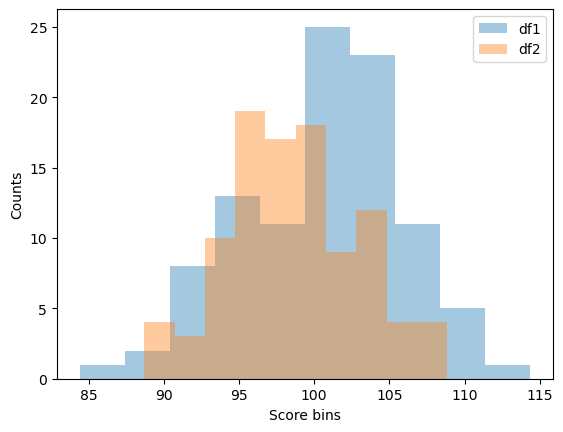

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')

plt.hist(df1, label='df1', alpha = 0.4) # alpha: 투명도
plt.hist(df2, label='df2', alpha = 0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend() # 범례 표시 위치

plt.show()

In [39]:
df1.head()

,data
0,105.408458
1,108.722618
2,84.398634
3,100.510816
4,100.965949


In [38]:
# 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지
from scipy.stats import shapiro # 정규성 검정
print(shapiro(df1))
print(shapiro(df2))

ShapiroResult(statistic=0.9860948333328386, pvalue=0.37968357263512703)
ShapiroResult(statistic=0.9901827646291551, pvalue=0.6793743269084339)


df1, df2 둘다 p-value > 0.05 -> 귀무가설 유의. 기각 불가 <br>
둘 다 정규성 가짐

In [40]:
from scipy.stats import levene
print()
print(levene(df1['data'], df2['data']))



LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469269)


p-value > 0.05 이므로 귀무가설 유의함. 기각 불가 -> 등분산성 가짐<br>
등분산이므로, equal_var=True 파라미터 주고 ttest_ind 모듈로 t-test 진행

In [41]:
from scipy.stats import ttest_ind
print()
print(ttest_ind(df1, df2, equal_var=True))


TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))


p-value < 0.05 이므로 귀무가설 기각. 대립가설 채택.<br>
=> 두 학습의 시험 평균은 동일하지 않다.

### Q.
두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라


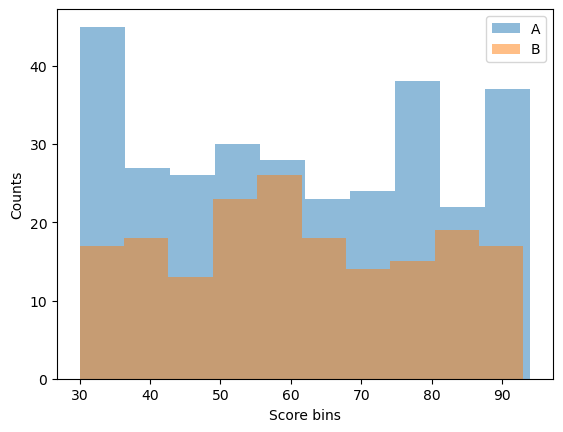

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'], alpha=0.5, label='A')
plt.hist(df['B'].dropna(), alpha=0.5, label='B')
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [45]:
# 분포 그려봤을 때 정규성 안보임
# 두 그룹 중 한 그룹만 정규성을 위배해도 독립표본 t-검정 할 수 x
print(shapiro(df['B'].dropna()))
print(shapiro(df['A']))

ShapiroResult(statistic=0.963943232017511, pvalue=0.00013568101164926347)
ShapiroResult(statistic=0.9375393672524903, pvalue=6.175255664338868e-10)


두 그룹 다 p-value < 0.05 이므로 귀무가설 유의 x. 귀무가설 기각 <br>
-> 정규성 만족x => **비모수 검정 실시**

In [47]:
from scipy.stats import mannwhitneyu, ranksums
print()
print(mannwhitneyu(df['A'], df['B'].dropna()))
print(ranksums(df['A'], df['B'].dropna()))


MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


mann-whitney u 검정, 윌콕슨 순위합 검정 모두 p-value > 0.05 : 귀무가설 유의<br>
귀무가설 기각 불가. 평균은 동일하다.

### Q.
두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

df
# df.info()

,group,data
0,a,108.065847
1,a,88.714106
2,a,61.182748
3,a,51.763444
4,a,127.858730
...,...,...
185,b,100.192985
186,b,112.081790
187,b,83.148014
188,b,147.504761


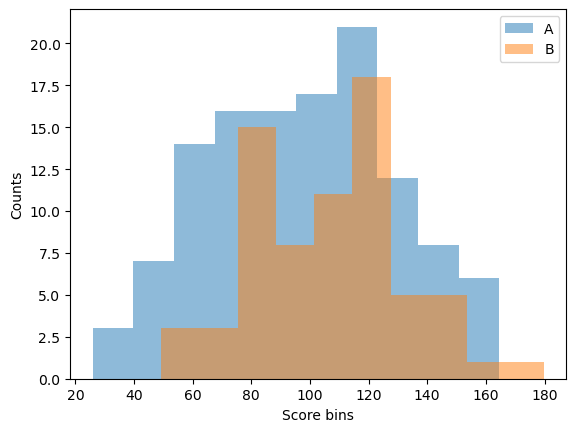

In [56]:
plt.hist(df[df['group'] == 'a'].data, label='A', alpha = 0.5)
plt.hist(df[df['group'] == 'b'].data, label='B', alpha = 0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [57]:
# 정규성 검정
# 하나라도 정규성 만족하지 못하면 t-test불가(equal_var=False)
a = df[df['group'] == 'a'].data
b = df[df['group'] == 'b'].data

from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))


ShapiroResult(statistic=0.983412964740451, pvalue=0.1474180067494916)
ShapiroResult(statistic=0.9831848013864206, pvalue=0.4701751973689775)


p-value > 0.05 => 귀무가설 기각 불가<br>
두 그룹 모두 정규성 가짐

In [58]:
# 등분산성 검정
from scipy.stats import levene
print()
print(levene(a,b))



LeveneResult(statistic=6.185601018015722, pvalue=0.01375048457191142)


p-value < 0.05 : 귀무가설 유의 x. 기각. 
등분산성 가지지 x => equal_var = False

In [59]:
from scipy.stats import ttest_ind
print()
print(ttest_ind(a,b,equal_var=False))


TtestResult(statistic=-2.1949470315829265, pvalue=0.029512802991767905, df=171.25282465005142)


p-value < 0.05 이므로 귀무가설 기각. 평균 동일x<br>
정규성은 가지지만 등분산은 x, 평균은 동일하다고 보기 어려움

### Q.
두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

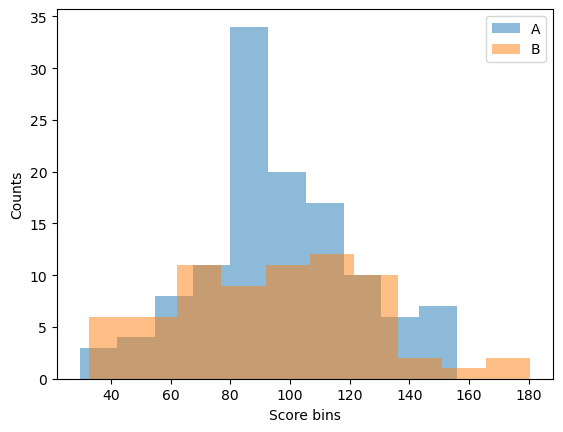

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')
plt.hist(df['a'], alpha=0.5, label='A')
plt.hist(df['b'], alpha=0.5, label='B')
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       120 non-null    float64
 1   b       70 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


In [63]:
# 그룹 분리
a = df['a']
b = df['b'].dropna()

# 정규성 검정
from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=0.9865897179339462, pvalue=0.2839111805144782)
ShapiroResult(statistic=0.9854325124950464, pvalue=0.5937526914945417)


둘 다 p-value > 0.05 이므로 귀무가설 기각 불가. 정규성 만족

In [64]:
# levene 검정
from scipy.stats import levene
print()
print(levene(a,b))


LeveneResult(statistic=3.9862856894158347, pvalue=0.047314956128685116)


p-value < 0.05 이므로 귀무가설 기각. 등분산성 만족x

In [65]:
# ttest_ind(equal_var=False)
from scipy.stats import ttest_ind
print()
print(ttest_ind(a,b,equal_var=False))


TtestResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704, df=122.72255248639058)


p-value > 0.05 이므로 귀무가설 유의.. 기각 불가 -> 평균값 동일하다<br>
두 그룹은 모두 정규성을 가지지만, 등분산성을 만족하진 않으며, 평균은 동일하다고 볼 수 있다.

# 대응표본 t 검정(paired)
- ttest_rel 사용(두 집단이 종속되어있을 때)
- ttest_ind : 두 집단이 독립일 때

### Q. 
특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라

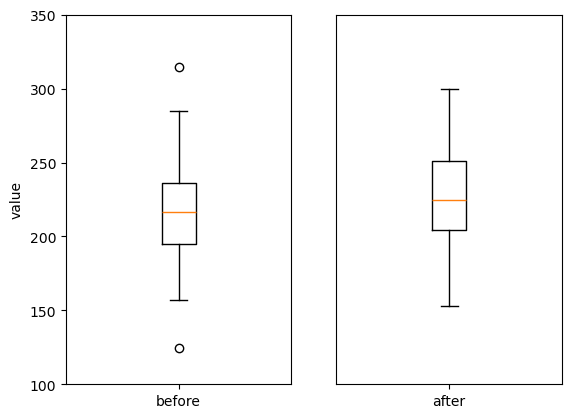

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

# df.info()
fig, ax = plt.subplots(1,2) # 2개의 서브플롯을 가로로 나란히 생성할 때 사용하는 코드
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [70]:
# 정규성 검정

from scipy.stats import shapiro
before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.9907895174016044, pvalue=0.6065791087935366)
ShapiroResult(statistic=0.9916963493176595, pvalue=0.692386232128563)


p-value > 0.05 이므로 귀무가설 기각 불가. 둘 다 정규성 가짐

In [71]:
# 등분산성 검정
from scipy.stats import levene
print()
print(levene(before,after))


LeveneResult(statistic=0.06427968690211051, pvalue=0.800074165167839)


p-value > 0.05 이므로 귀무가설 기각 불가. 등분산성 가짐

In [72]:
from scipy.stats import ttest_rel
print(ttest_rel(before,after))

TtestResult(statistic=-2.5535473487670672, pvalue=0.011926744724546521, df=119)


p-value < 0.05 이므로 귀무가설 기각. 평균 동일 x

### Q.
특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

df.head()

,before,after
0,253.566615,220.857837
1,195.080189,209.206667
2,228.299690,173.070057
3,279.417367,222.356980
4,230.062210,248.371045


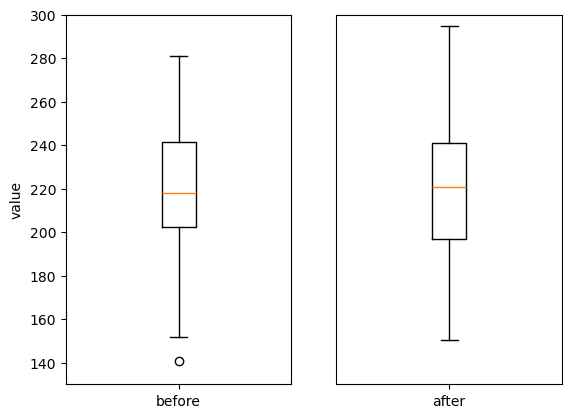

In [75]:
fig, ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130, 300)
ax[1].set_ylim(130, 300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [76]:
# 그룹 분할
before = df['before']
after = df['after']

# 정규성 검정
from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.9920635606877197, pvalue=0.7270650360964436)
ShapiroResult(statistic=0.992019320852851, pvalue=0.7229094514792569)


둘 다 p-value > 0.05 이므로 귀무가설 기각 불가. 정규성 만족

In [77]:
# 등분산성 검정
from scipy.stats import levene
print(levene(before, after))

LeveneResult(statistic=1.3463330638203614, pvalue=0.24708279045237283)


p-value > 0.05 이므로 귀무가설 기각 불가. 등분산성 만족

In [79]:
# 평균값 검정. 등분산성 만족하므로 equal_var=True(기본 값)
from scipy.stats import ttest_rel
print(ttest_rel(before, after))

TtestResult(statistic=0.18890057599102558, pvalue=0.8504925317234712, df=119)
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


p-value > 0.05 이므로, 귀무가설 유의함. 평균값 차이 없다.

### Q. 특정 집단의 학습 전후 시험 성적 변화를 나타낸 데이터이다. 시험 전과 후에 차이가 있는지 검정하라

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

print(df.info())
print(df.head())
# print(df['before'])
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   before  50 non-null     int64
 1   after   50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes
None
   before  after
0     153    162
1     153    163
2     158    159
3     157    158
4     167    160
           before      after
count   50.000000   50.00000
mean   157.000000  159.52000
std      5.454824    5.83529
min    150.000000  150.00000
25%    153.000000  154.25000
50%    156.000000  159.50000
75%    162.000000  164.50000
max    168.000000  169.00000


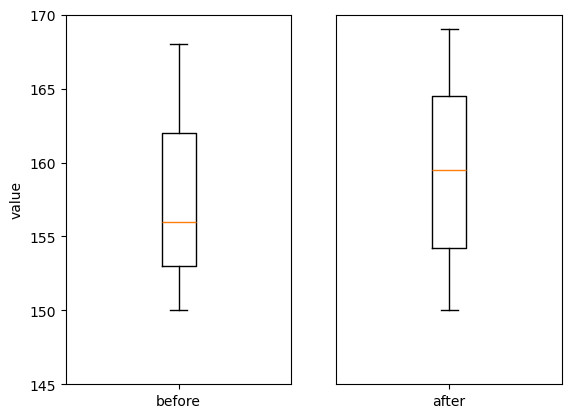

In [84]:
fig, ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(145, 170)
ax[1].set_ylim(145, 170)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [85]:
# 데이터 분할
before = df['before']
after = df['after']

# 정규성 검정
from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.917372758507538, pvalue=0.001897357184031842)
ShapiroResult(statistic=0.9448970350592877, pvalue=0.021140909861349883)


둘 다 p-value < 0.05 : 귀무가설 기각 가능. 둘 다 정규성 만족x

In [86]:
# 등분산성 검정
from scipy.stats import levene
print(levene(before, after))

LeveneResult(statistic=0.14329522146179022, pvalue=0.7058456563194881)


p-value > 0.05 : 귀무가설 기각 불가. 등분산성 만족

In [87]:
# 정규성 x, 등분산성 o 이므로 대응표본의 경우 등분산성이 파라미터에 영향 주지 x
# 정규성 가지지 x => 대응 표본 검정 중 비모수 검정(윌콕슨 부호순위 검정 진행)

from scipy.stats import wilcoxon
print(wilcoxon(before, after))

WilcoxonResult(statistic=437.0, pvalue=0.12098409484052806)


p-value > 0.05 이므로 귀무가설 기각 불가. 전후 평균 동일

### Q. 한 기계 부품의 rpm 수치를 두가지 다른 상황에서 측정했다.(총 70세트) b 상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')

print(df.info())
print(df.describe())
print(df['group'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rpm     140 non-null    float64
 1   group   140 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.3+ KB
None
              rpm
count  140.000000
mean   499.382725
std     29.666092
min    433.897948
25%    477.976414
50%    500.709539
75%    518.455160
max    583.746527
['a' 'b']


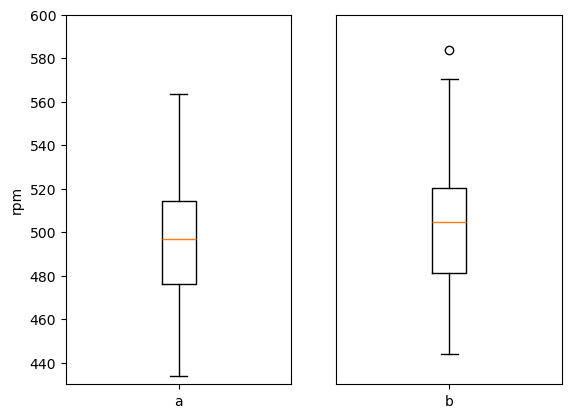

In [92]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(df[df['group']=='a'].rpm)
ax[1].boxplot(df[df['group']=='b'].rpm)
ax[0].set_xticklabels(['a'])
ax[1].set_xticklabels(['b'])
ax[0].set_ylim(430, 600)
ax[1].set_ylim(430, 600)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('rpm')
plt.show()

In [93]:
# 그룹 분리
a = df[df['group']=='a'].rpm
b = df[df['group']=='b'].rpm

# 정규성 검정
from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=0.9907215247460177, pvalue=0.8884202208538523)
ShapiroResult(statistic=0.9846746597671581, pvalue=0.5504989397841885)


In [94]:
# 등분산성 검정
from scipy.stats import levene
print(levene(a,b))

LeveneResult(statistic=0.06716114122680156, pvalue=0.7959020864923277)


정규성 , 등분산성 모두 기각 불가! 정규성, 등분산성 만족

In [97]:
from scipy.stats import ttest_rel
# 대립가설: a > b
print(ttest_rel(a,b,alternative='greater'))

TtestResult(statistic=-1.9018108294460812, pvalue=0.9693143365355352, df=69)


p-value > 0.05 : 기각 불가. 평균 a>b이다.

# 카이제곱 검정(교차분석)
1. 일원 카이제곱검정(chisquare, 카이제곱 적합도 검정)
   : 한 개의 요인에 의해 k개 범주를 가질 때 이론적 분포를 따르는지 검정
2. 이원 카이제곱검정(chi2_contingency, fisher_exact(빈도 수 5개 이하 셀이 20% 이상일때), 카이제곱독립검정)
   : 모집단이 두개의 변수에 의해 범주화되었을 때, 두 변수들 사이의 관계가 독립인지 아닌 지 검정

# Q.
144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   dice_number  6 non-null      int64
 1   counts       6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes
None
       dice_number    counts
count     6.000000   6.00000
mean      3.500000  24.00000
std       1.870829   3.34664
min       1.000000  20.00000
25%       2.250000  22.00000
50%       3.500000  23.00000
75%       4.750000  27.00000
max       6.000000  28.00000


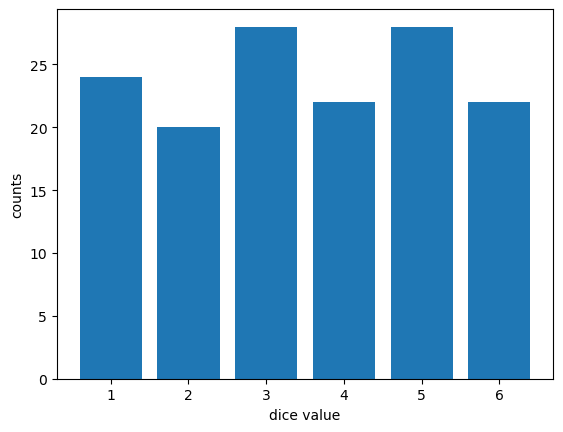

In [99]:
plt.bar(df.dice_number, df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

In [100]:
# 주사위 눈금 발생확률 = 1/6 -> 각 눈금의 기댓값: 실제 발생한 모든 값을 6으로 나눈 값

from scipy.stats import chisquare
df['expected'] = (df['counts'].sum()/6).astype('int')
print(chisquare(df.counts, df.expected))


Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


p-value > 0.05 이므로 귀무가설 유의함. 기각 불가. 각 주사위 눈금 발생 비율은 동일하다.

### Q. 
다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다. 인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다.
이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [109]:
# 왼손잡이 확률 = 0.2, 오른손잡이 확률 = 0.8
# 알려진 비율로 계산된 기댓값을 구하여 카이제곱검정 시행
target = df.hands.value_counts().to_frame(name='hands')
target.head()
# 알려진 비율로 계산된 기대값
target['expected'] = [int(target.hands.sum()*0.8), int(target.hands.sum()*0.2)]
display(target)


,hands,expected
hands,,
right,420,400
left,80,100


In [110]:
from scipy.stats import chisquare
print(chisquare(target.hands, target.expected))

Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468252)


p-value < 0.05 이므로 귀무가설 기각. <br>
주어진 집단의 왼손, 오른손 비율은 0.2, 0.8로 볼 수 x

### Q.
다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [112]:
# pd.crosstab: 두 범주형 변수의 교차표를 만드는 함수
cdf = pd.crosstab(df['측정회원성별'], df['등급'])
display(cdf)

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


In [116]:
from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))
print()
chi2, p, dof, expected = chi2_contingency(cdf)
print(p)

Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401678e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))

7.481892813401678e-26


### Q. 성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석간에 관련이 있는지 검정하라

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [118]:
# 총합 제외하고 dataframe
cdf = df.iloc[:-1,:-1]
display(cdf)

,불참,참석
남성,4,2
여성,1,9


In [120]:
from scipy.stats import chi2_contingency, fisher_exact
print(chi2_contingency(cdf))

Chi2ContingencyResult(statistic=3.277575757575758, pvalue=0.07023259819117433, dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))


카이 제곱 검정 -> p-value > 0.07 : 귀무가설 기각 불가. 성별과 참석 엽부는 관련이 없다(독립) <br>
**but**
5보다 작은 셀이 20%가 넘어가므로(75%) 피셔의 정확검정 사용해야됨

카이제곱 검정 조건
- 기대도수(expected frequency)가 모든 셀에서 5이상이어야
- 또는, 전체 셀의 20% 이하만 5미만이어야됨

In [121]:
print(fisher_exact(cdf))

SignificanceResult(statistic=18.0, pvalue=0.03571428571428571)


피셔 정확성 검정 결과 p-value < 0.05 : 귀무가설 기각 불가 <br>
성별과 참석여부는 관련이 있다.